# Singular spectrum transformation
特異スペクトル変換で変化点検知してみる

In [1]:
import numpy as np
import matplotlib.pyplot as plt

移動ロボットがまっすぐ走ったのち、壁にぶつかったときの加速度データを読み込む

In [2]:
data = np.loadtxt("data1/crash.txt")  # データの読み込み
data_z = data[0:,2:3]                 # z軸の加速度データを取り出す

窓幅とか設定する

In [3]:
M = 5  # 窓幅
n = 3  # trajectory matrixの列数
r = 2  # trajectory matrixのパターン数
k = 3  # test matrixの列数
m = 2  # test matrixのパターン数
L = 3  # ラグ
a_offset = n+M-1  # 異常度のグラフ描画位置

T個のデータ$D$を用意する

$$
D=\left\{ \xi ^{(1)},\xi ^{(2)},\ldots ,\xi ^{(T)}\right\} 
$$

$n$番目のデータを先頭に、長さMのベクトルを作る

$$
x^{(n)}=\begin{bmatrix}
\xi ^{(n)} \\
\xi ^{(n+1)} \\
\vdots \\
\xi ^{(n+M)}
\end{bmatrix}
$$

履歴行列$X^{(t)}$とテスト行列$Z^{(t)}$を、それぞれ列数$n,k$で生成する  
(なんか式が左寄せになっちゃった)  

$X^{(t)} \equiv [x^{(t-n-M+1)},\ldots,x^{(t-M-1)},x^{(t-M)}]$  

$Z^{(t)} \equiv [x^{(t-k+L-M+1)},\ldots,x^{(t-M+L-1)},x^{(t-M+L)}]$  

$X^{(t)}$と$Z^{(t)}$を特異値分解し、それぞれ左特異ベクトルを$r,m$本取り出した行列$U_{r}^{(t)}, Q_{m}^{(t)}$を生成する

$U_{r}^{(t)}\equiv [u^{\left( t,1\right) },u^{\left( t,2\right) },\ldots u^{\left( t,r\right) }]$  
$Q_{m}^{(t)}\equiv [q^{\left( t,1\right) },q^{\left( t,2\right) },\ldots q^{\left( t,m\right) }]$  

$U^{\left( t\right) ^{T}}_{r}Q^{\left( t\right) }_{m}$の特異値を異常度とする  
($\| U^{\left( t\right) ^{T}}_{r}Q^{\left( t\right) }_{m}\| _{2}$は$U^{\left( t\right) ^{T}}_{r}Q^{\left( t\right) }_{m}$の特異値と同じらしい)  
(知らんけど。。。)  

$$
a\left( t\right) =1-\| U^{\left( t\right) ^{T}}_{r}Q^{\left( t\right) }_{m}\| _{2}
$$

In [4]:
a = np.array([])  # 異常度のリスト

for t in range(n+M-1, len(data_z) -L-1):          # スライド窓をスライド
    X = data_z[t-n-M+1  : t-n+1]                  # trajectory matrixの生成
    for c in range(1, n):
        X = np.c_[X, data_z[t-n-M+1+c : t-n+1+c]]
    
    Z = data_z[t-k+L-M+1 : t-k+L+1]               # test matrixの生成
    for c in range(1, k):
        Z = np.c_[Z, data_z[t-k+L-M+1+c : t-k+L+1+c]]
    
    U1, S1, V1  = np.linalg.svd(X, full_matrices=False)    # singular value decomposition
    U2, S2, V2  = np.linalg.svd(Z, full_matrices=False)
    
    U_r  = U1[:, :r]
    Q_m  = U2[:, :m]
    
    s = np.linalg.svd(U_r.T.dot(Q_m), full_matrices=False, compute_uv=False)
    a = np.append(a, 1 - s[0])
    
a_max = np.max(a)  # 異常度の最大値を1とする
a = a / a_max

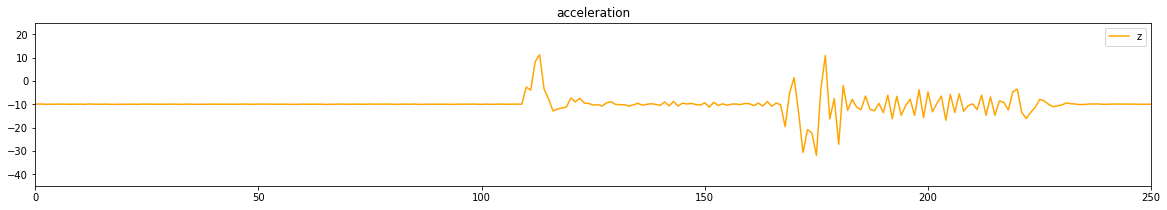

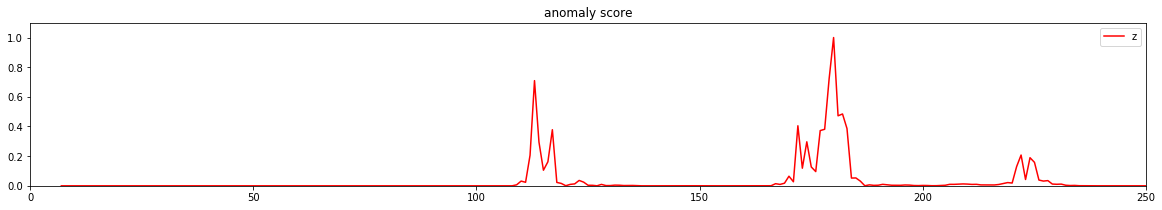

In [5]:
t = np.arange(0, len(data_z), 1)

fig = plt.figure(figsize=(20,3))
sp = fig.add_subplot(111)
sp.set_xlim(0, 250)
sp.set_ylim(-45, 25)
plt.title("acceleration")
plt.plot(t, data_z, color = "orange",label="z")
plt.legend()
plt.show()

t = np.arange(a_offset, len(a) + a_offset, 1)

fig = plt.figure(figsize=(20,3))
sp = fig.add_subplot(111)
sp.set_xlim(0, 250)
sp.set_ylim(0, 1.1)
plt.title("anomaly score")
plt.plot(t, a, color = "red",label="z")
plt.legend()
plt.show()